# Chapter 9: Probabilities and the Bayesian approach

In this chapter, we looked at an example of fitting a straight line using the Bayesian approach and the MCMC algorithm. 

There is a file in this directory called mcmc.py, which contains the necessary functions for running the MCMC algorithm.



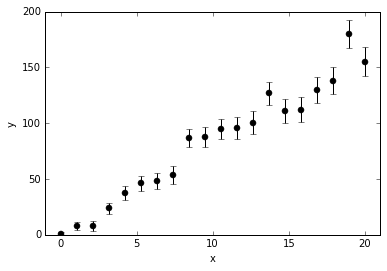

In [12]:
import pylab as pl
import numpy as np
import math
import mcmc as MC
%matplotlib inline

#We have some global variables to be used in our functions:
global xdata,ydata,sigmadata,sigma_pars

#We need to define some functions:

#The model (in our case, 2 parameters for a straight line):
def model(pars,x):
    """return a value for the model based on the parameters
    and one independent coordinate"""
    return pars[0]+pars[1]*x

#A function to calculate chi-squared between data and model:
def chisquare(a,b,sigma):
    """Simple chi-squared between 2 NP arrays. Assumes that sigmas are non-zero!!!"""
    return (((a-b)/sigma)**2).sum()

#A function to calculate the actual likelihood multiplied by the prior (assuming gaussian prior)
def likelihood(pars,pars_constraints):
    """Return likelihood as estimated from a chi-squared and gaussian 
    constraints/priors on parameters"""
    #add terms to chi-squared from prior gaussian constraints
    prior_chi=0
    for i in range(len(pars_constraints)):
        mu,sigma = pars_constraints[i]
        if sigma != 0:
            prior_chi = prior_chi + (pars[i]-mu)**2/sigma**2 
            
    #The total likelihood has the chi-squared from the data and the prior:        
    return math.exp(-0.5*(chisquare(ydata,model(pars,xdata),sigmadata)+prior_chi))

#This is a function needed by MCMC
def proposal_pars(pars):
    """Generate trial parameters based on a gaussian proposal distribution"""
    test_pars=np.random.normal(pars,sigma_pars)
    return test_pars


#The actual data:
xdata=np.array([0.00,1.05,2.11,3.16,4.21,5.26,6.32,7.37,8.42,9.47,10.53,11.58,12.63,
                13.68,14.74,15.79,16.84,17.89,18.95,20.00])
ydata=np.array([0.51,7.80,7.55,23.62,37.59,46.09,48.35,53.67,86.75,87.61,94.84,95.65,
                100.46,126.74,110.95,112.10,129.91,138.07,180.20,155.10])
sigmadata=np.array([1.73,3.38,4.45,5.32,6.06,6.72,7.32,7.87,8.39,8.88,9.34,9.78,10.20,
                    10.61,11.00,11.37,11.74,12.09,12.43,12.77])

#which we plot:
pl.errorbar(xdata,ydata,sigmadata,fmt='o',color='black')
pl.axis([-1,21,0,200])
pl.xlabel('x')
pl.ylabel('y')
pl.show()

In [13]:
#Now, we use the MCMC algorithm:
#This can be slow if the number of MCMC steps is large!!!

#Initialize the parameters (use the known true values)
start_pars=np.array([3,8])
#Set the sigmas for the proposal distributions
sigma_pars=np.array([1.0,1.0])
#Provide gaussian constraints (priors) for the parameters using mu and sigma
par_constraints = [(0,0),(10,0.1)] #no constraint on a, 10+/-0.1 on b

mcmc=MC.MCMC(start_pars,par_constraints)
mcmc.get_likelihood=likelihood#set the likelihood function
mcmc.get_proposal_pars=proposal_pars#set the proposal function for trial pars
mcmc.run(1000000,1000)#The number of steps, and the number of burnin

results=MC.MCMCResult(mcmc.accepted[mcmc.burnin:])

#pull out the accepted values of each parameter
par0 = mcmc.accepted[mcmc.burnin:,0]
par1 = mcmc.accepted[mcmc.burnin:,1]

#print out the resulting mean and standard deviation for the parameters
print("par0 : = {:.2f} +/- {:.2f}".format(par0.mean(),par0.std(ddof=1)))
print("par1 : = {:.2f} +/- {:.2f}".format(par1.mean(),par1.std(ddof=1)))


par0 : = -5.12 +/- 1.22
par1 : = 9.75 +/- 0.09


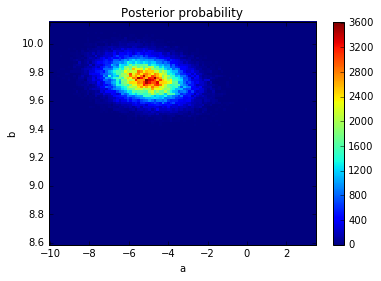

In [14]:
#The 2D posterior:
pl.hist2d(mcmc.accepted[:,0],mcmc.accepted[:,1],bins=100)
pl.xlabel('a')
pl.ylabel('b')
pl.title('Posterior probability')
pl.colorbar()
pl.show()



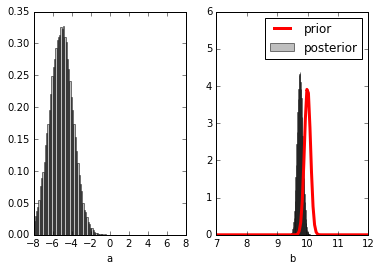

In [15]:
#The two 1-D posteriors:
import scipy.stats as stats

pl.Figure()
pl.subplot(121)
n,bins,patches=pl.hist(mcmc.accepted[:,0],bins=100, color='gray', alpha=0.5, normed=True)
pl.xlabel('a')
pl.axis([-8,8,0,0.35])
pl.subplot(122)
n,bins,patches=pl.hist(mcmc.accepted[:,1],bins=100, color='gray', alpha=0.5, normed=True,label='posterior')
bw=bins[2]-bins[1]
pl.axis([7,12,0,6.])
xi = np.linspace(7,12,100)
mu,sigma = par_constraints[1]
pl.plot(xi,stats.norm.pdf(xi,mu,sigma),color='red',lw=3,label='prior')
pl.xlabel('b')
pl.legend(loc='best')
pl.show()